In [36]:
!pip install scikit-learn

In [37]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations
import matplotlib.pyplot as plt

In [39]:
bankChurn_df = pd.read_csv("Customer-Churn-Records.csv")

In [41]:
bankChurn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


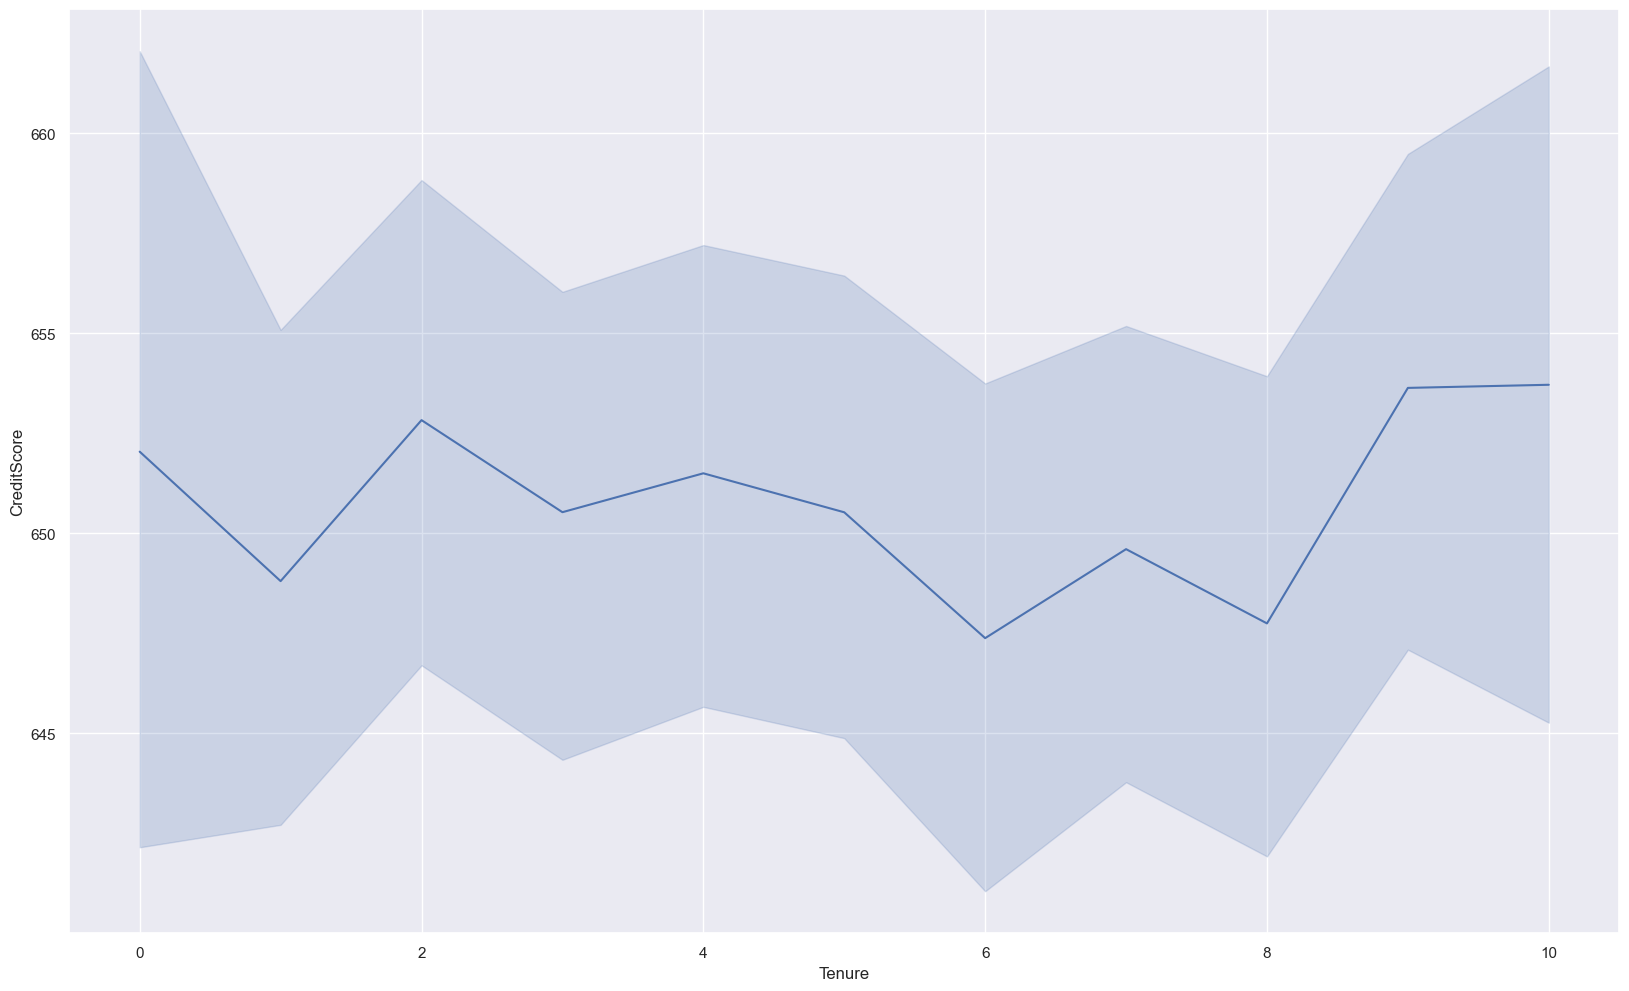

In [46]:
sns.set(rc={"figure.figsize":(20,12)})
fig = sns.lineplot(data=bankChurn_df, x='Tenure', y='CreditScore')

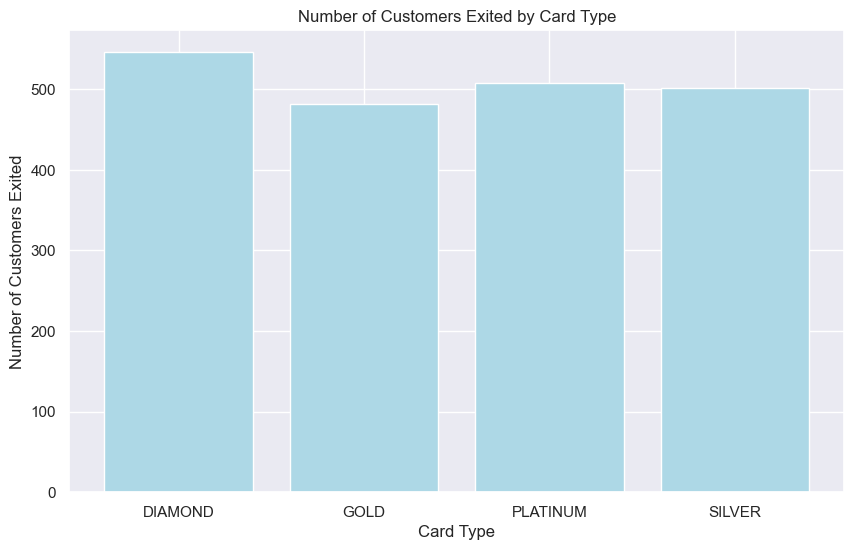

In [74]:
exited_customers = bankChurn_df[bankChurn_df['Exited'] == 1]
# Group by Card Type and count the number of customers who exited
cardType = exited_customers.groupby('Card Type')['CustomerId'].count()

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size if needed
plt.bar(cardType.index, cardType.values, color='lightblue')

# Add labels and title
plt.xlabel('Card Type')
plt.ylabel('Number of Customers Exited')
plt.title('Number of Customers Exited by Card Type')

# Display the plot
plt.show()

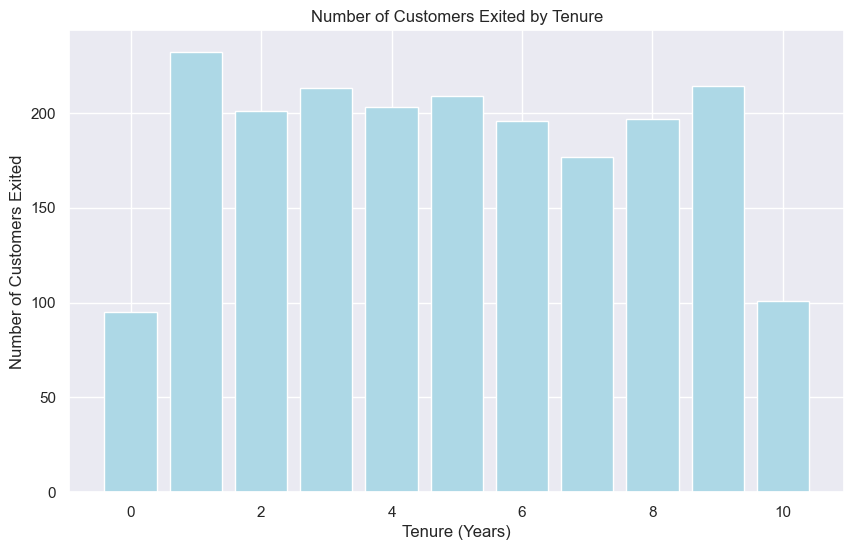

In [70]:
exited_customers = bankChurn_df[bankChurn_df['Exited'] == 1]

# Group by Tenure and count the number of customers who exited
tenure_counts = exited_customers.groupby('Tenure')['CustomerId'].count()

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size if needed
plt.bar(tenure_counts.index, tenure_counts.values, color='lightblue')

# Add labels and title
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers Exited')
plt.title('Number of Customers Exited by Tenure')

# Display the plot
plt.show()

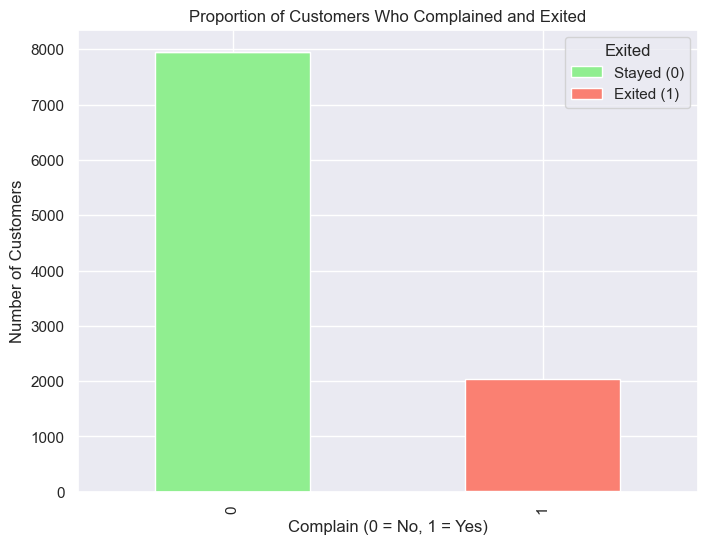

In [76]:
# Group by 'Complain' and 'Exited' to count occurrences
complain_exit_counts = bankChurn_df.groupby(['Complain', 'Exited']).size().unstack()

# Create a stacked bar chart
complain_exit_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(8, 6))

# Add labels and title
plt.xlabel('Complain (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.title('Proportion of Customers Who Complained and Exited')

# Add a legend for better understanding
plt.legend(title='Exited', labels=['Stayed (0)', 'Exited (1)'])

# Show the plot
plt.show()

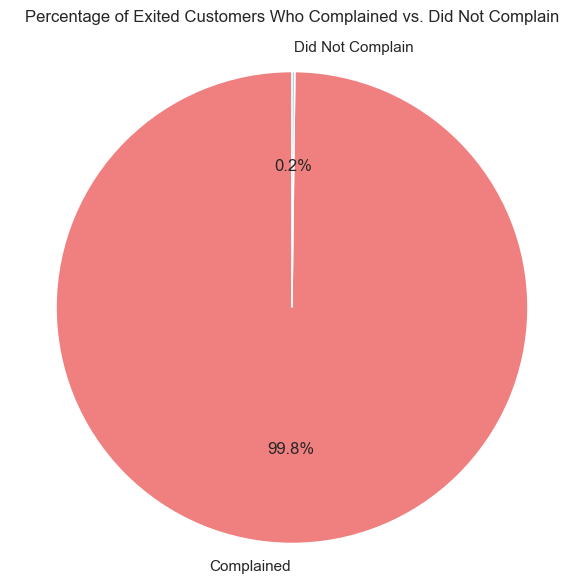

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file (replace with your actual CSV loading)
# df = pd.read_csv('customers.csv')

# Filter data for customers who exited (Exited = 1)
exited_customers = bankChurn_df[bankChurn_df['Exited'] == 1]

# Count the number of exited customers who complained vs. did not complain
complained = exited_customers[exited_customers['Complain'] == 1].shape[0]
did_not_complain = exited_customers[exited_customers['Complain'] == 0].shape[0]

# Data for the pie chart
labels = ['Complained', 'Did Not Complain']
sizes = [complained, did_not_complain]  # Sizes based on counts
colors = ['lightcoral', 'lightblue']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title with padding to give more space
plt.title('Percentage of Exited Customers Who Complained vs. Did Not Complain', pad=20)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


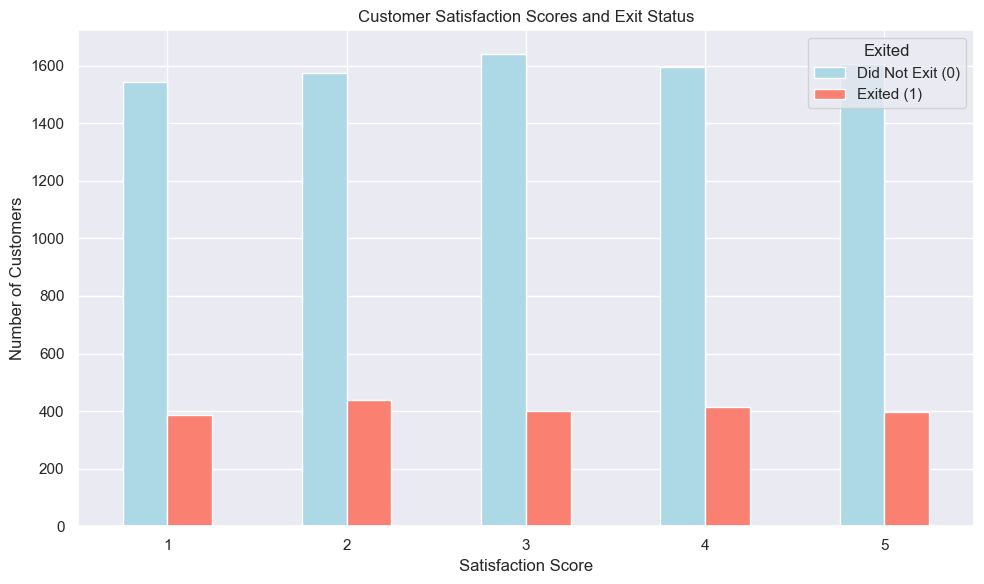

In [82]:
satisfaction_exit_counts = bankChurn_df.groupby(['Satisfaction Score', 'Exited']).size().unstack(fill_value=0)

# Plotting the bar graph
satisfaction_exit_counts.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])

# Add labels and title
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.title('Customer Satisfaction Scores and Exit Status')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

# Add a legend for better understanding
plt.legend(title='Exited', labels=['Did Not Exit (0)', 'Exited (1)'])

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [88]:
x = bankChurn_df[['Complain']]
y = bankChurn_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[1606    1]
 [   1  392]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

